In [35]:
import sys
import os
sys.path.append("..")
from pyvis.network import Network
from aicnet.environment import Environment
import networkx as nx
import shutil
from itertools import product
import json

In [2]:
# # Environment variables
# brokerPersonality = "LOW_PRICE_LENIENT"
# noTransportProviders = 15
# noCargoOwners = 1000
# maxNegotiationIterations = 12
# displacement = 30  # percentage
# deviation = 10  # the smaller the more diverse population
# # initialising the environment
# e = Environment(
#     brokerPersonality,
#     noTransportProviders,
#     noCargoOwners,
#     maxNegotiationIterations,
#     displacement,
#     deviation
# )

# e.icnet_experiment(1000)
# e.aicnet_experiment(1000, "pagerank", False)
# e.stats.get_avg_no_iterations_per_negotiation(1)
# e.stats.get_avg_no_iterations_per_negotiation(2)
# e.stats.get_transporter_gain_stats(1)
# e.stats.get_transporter_gain_stats(2)
# e.stats.get_winning_transporter_personality_stats(1)
# e.stats.get_winning_transporter_personality_stats(2)
# e.stats.get_nr_of_failed_negotiations(1)
# e.stats.get_nr_of_failed_negotiations(2)
# e.stats.plot_sorted_winning_transporters()

# e.stats.build_graph(1)
# e.stats.build_graph(2)

# e.stats.save_graph(1, "icnet_graph")
# e.stats.save_graph(2, "aicnet_graph")

In [36]:
def save_network_graph(networkx_graph, folder):
    G = Network()
    GH = Network()
    G.from_nx(networkx_graph)

    edges = G.edges
    nodes = G.nodes

    node_size = {}
    for edge in G.edges:
        node_id = edge['from']
        if node_id not in node_size:
            node_size[node_id] = 1
        else:
            node_size[node_id]+=1

    for node_id in node_size:
        GH.add_node(node_id, label=str(node_id), value=node_size[node_id], color='orange')
    for node in nodes:
        if node['id'] in node_size:
            continue
        GH.add_node(node['id'], label=str(node['id']), value=1)
    for edge in edges:
        GH.add_node(node_id, label=str(edge['to']), value=1, color='gray')
        GH.add_edge(edge['from'], edge['to'], color='gray')

    GH.toggle_physics(True)
    GH.show_buttons(filter_=['physics'])
    GH.write_html(os.path.join(folder,"mygraph.html"))
    
    # Serialize to disk
    with open(os.path.join(folder, 'graph.json'), 'w') as fout:
        json.dump(edges, fout)
        

In [37]:
def simulation(numberOfCargos, brokerPersonality, 
               noTransportProviders,noCargoOwners,
               maxNegotiationIterations,displacement,
               deviation, 
               aicnetRankMethod, aicnetRankReverseFlag):
    
    simulation_name = "_".join([
        str(numberOfCargos),
        str(brokerPersonality),
        str(noTransportProviders),
        str(noCargoOwners),
        str(maxNegotiationIterations),
        str(displacement),
        str(deviation),
        str(aicnetRankMethod),
        str(aicnetRankReverseFlag)
    ])
    
    simulation_path = os.path.join("simulations", simulation_name)
    shutil.rmtree(simulation_path)
    os.makedirs(simulation_path)
    
    e = Environment(
        brokerPersonality,
        noTransportProviders,
        noCargoOwners,
        maxNegotiationIterations,
        displacement,
        deviation
    )

    e.icnet_experiment(numberOfCargos)
    e.aicnet_experiment(numberOfCargos, "pagerank", False)
    e.stats.get_avg_no_iterations_per_negotiation(1)
    e.stats.get_avg_no_iterations_per_negotiation(2)
    e.stats.get_transporter_gain_stats(1)
    e.stats.get_transporter_gain_stats(2)
    e.stats.get_winning_transporter_personality_stats(1)
    e.stats.get_winning_transporter_personality_stats(2)
    e.stats.get_nr_of_failed_negotiations(1)
    e.stats.get_nr_of_failed_negotiations(2)
    
    # Plotting
    e.stats.plot_sorted_winning_transporters(simulation_path)
    #e.stats.plot_metric_comparison("pagerank", simulation_path)
    e.stats.plot_sorted_successfull_biding_cargo_owners(simulation_path)
    
    e.stats.build_graph(1)
    e.stats.build_graph(2)

    e.stats.save_graph_adj(1, simulation_path)
    e.stats.save_graph_adj(2, simulation_path)
    
    save_network_graph(e.stats.graph_icnet, simulation_path)
    save_network_graph(e.stats.graph_aicnet, simulation_path)    

In [38]:

options_numberOfCargos = [10]
options_brokerPersonality = ["HIGH_PRICE_LENIENT", "HIGH_PRICE_CONSERVATIVE","LOW_PRICE_LENIENT", "LOW_PRICE_CONSERVATIVE"]
options_noTransportProviders = [15, 500]
options_noCargoOwners = [1000, 5000]
options_maxNegotiationIterations = [12, 200]
options_displacement = [10, 90]
options_deviation = [10, 90]
options_aicnetRankMethod = ["pagerank"]
options_aicnetRankReverseFlag = [True, False]
simulation_options = list(product(
    options_numberOfCargos,
    options_brokerPersonality,
    options_noTransportProviders,
    options_noCargoOwners,
    options_maxNegotiationIterations,
    options_displacement,
    options_deviation,
    options_aicnetRankMethod,
    options_aicnetRankReverseFlag,
))
len(simulation_options)

256

0
1
2
3
4
5
6
7
8
9


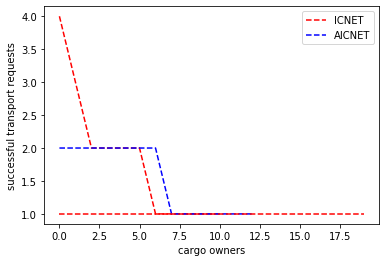

In [39]:
simulation(*simulation_options[0])